In [16]:
%matplotlib inline
import requests
import json
import ast
import string
import pandas as pd
import pymongo
from random import randint
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [17]:
job_categories = ["administrative-support",                    #01done
                  "audio-video-photography-production",        #02done
                 "business-merchant-development",              #03done
                 "business-intelligence",                      #04done
                 "buying-planning-instock-management",         #05done
                 "customer-service",                           #06done
                 "data-science",                               #07done
                 "database-administration",                    #08done
                 "design",                                     #09done
                 "economics",                                  #10done
                 "editorial-writing-content-management",       #11done
                 "facilities-maintenance-real-estate",         #12done
                 "finance-accounting",                         #13done
                 "fulfillment-operations-management",
                 "fulfillment-warehouse-associate",
                 "hardware-development",
                 "human-resources",                            #17done
                 "investigation-loss-prevention",
                 "leadership-development-training",
                 "legal",
                 "machine-learning-science",                   #21done
                 "marketing-pr",
                 "medical-health-safety",
                 "operations-it-support-engineering",          #24done
                 "project-program-product-management-non-tech",#25done
                 "public-policy",
                 "research-science",                           #27done
                 "sales-advertising-account-management",
                 "software-development",                      #29done
                 "solutions-architect",                        #30done
                 "supply-chain-transportation-management",     #31done
                 "systems-quality-security-engineering",       #32done
                 "project-program-product-management-technical"] #33done

In [18]:
added_stop_words = ["year","field","ability","related","using","employer","gender","equal","minority","sexual",\
                  "orientation","work","amazon","disability","concept","skill","language","team","tool","working",\
                  "building","highly","applied","problem","deep","including","presentation","equivalent","identity",\
                   "environment","relevant","track","set","strong","requirement","development","similar","role",\
                   "similar","big","verbal","large","result","model","knowledge","degree","complex","math","written",\
                   "excellent","able","abovementioned","academic", "female", "woman", "효율성", "aaa", "aac", "aap",\
                   "abathengi", "abb", "aber", "abgeschlossen", "ｉｔサービスマネジメントやｉｔビジネス運用等の経験",\
                   "ab", "abap", "abaqus", "ｉｔインフラの運用", "후보자는", "abgeschlossene", "abgeschlossenes", "abilità",\
                   "회의", "회의의", "효과적으로", "효율성등을", "효율적인", "ablility", "abschlussqualifikation", "화이트보딩",\
                   "환경의", "후보자", "abnormality", "aa", "aaai", "abahlukahlukileyo", "효율적으로", "활용한", "혹은",\
                   "aability", "환경에서", "현장", "aafa", "aat", "abgeschlossenem", "abgeschlossenem", "환경에서", "효과적인",\
                   "abhängig", "행사에서의", "현대", "현업", "현지", "협업을", "os", "support", "notwendige",'qualifikationen',\
  'abgeschlossene','kaufmännische','berufsausbildung','oder','relevante','berufserfahrung','bevorzugt','der',\
  'sachbearbeitung','mit','ausreichender','berufserfahrung','gleicher','bzw','ähnlicher','position','sehr','gute',\
  'kommunikations','und','konfliktfähigkeit','sowie','ausgeprägte','kundenorientierung','selbstständige','und',\
  'sorgfältige','arbeitsweise','sowie','ein','ausgeprägtes','organisationstalent','ausgeprägte','teamfähigkeit',\
  'und','hohe','serviceorientierung','sehr','gute','pckenntnisse','vorzugsweise','ms','office','insbesondere','sehr',\
  'gute','excelkenntnisse','begeisterung','im','umgang','mit','verschiedenen','und','neuen','systemen','gute',\
  'englischkenntnisse','wünschenswerte','qualifikationen','mindestens','jahr','erfahrung','gerne','einer',\
  'teamleiterfunktion','eines','operativen','bereiches','vorerfahrungen','im','bereich','der','personalsachbearbeitung',\
  'sind','sie','interessiert','wir','freuen','uns','darauf','von','ihnen','zu','hören','bitte','bewerben',\
  'sie','sich','unter','angabe','der','jobnummer','über','den','bewerberbutton','auf','unserer','website',\
  'sollten','die','bewerbungsunterlagen','nicht','vollständig','sein','anschreiben','lebenslauf','können','wir',\
  'ihre','bewerbung','leider','nicht','berücksichtigen','wir','wissen','dass','es','ihnen','wichtig','ist','wie',\
  'wir','ihre', 'persönlichen', 'daten', 'nutzen', 'und', 'schätzen', 'ihr', 'vertrauen', 'uns', 'dass', 'wir',\
  'diese','sorgfältig','und','gewissenhaft','behandeln','bitte','informieren','sie','sich','unserer','datenschutzerklärung',\
  'https','wwwamazonjobs','de','privacy','eu','um','mehr','darüber','zu','erfahren','wie','wir','personenbezogene',\
  'daten','unserer','bewerber','erheben','nutzen','und','übermitteln','amazon','ist','ein','arbeitgeber','der',\
  'chancengleichheit','fördert','und','fördermaßnahmen','zugunsten','benachteiligter','gruppen','bietet',"basic",\
    "qualifications","experience", "of", "years", "ea", "pa", "assistant", "given", "time", "assisting", "pc",\
    "computing", "located","mündlich", "schriftlich", "significance", "quantity","midcareer","considerably",\
    "portfolio", "yearround", "thoughtprovoking","nation","given","etre","older","time frequently", "older stand",\
    "employee issue", "classroom","localized", "instructional","adult","region site","legal","emergency","safety",\
    "specifically", "assumption","program","schedule","personal level","modern","design","science fundamental",\
    "software","professional software","ｉｔインフラの運用","ｉｔサービスマネジメントやｉｔビジネス運用等の経験","행사에서",\
    "solving","opportunity","skill","bachelor","service","age","understanding","proven","one","meet","etc",\
    "opportunityaffirmative","メール","everpositive","diary","person","quota","busdevemea","useful","教育レベル",\
    "einbringen","umfeldes","arbeitsumfeldes","problemlösungsfähigkeit","familiarizing","fixedterm","strongly",\
    "econometrics","encouraged background","strongly encouraged","task previous","adventure","completed","pride",\
    "walk","nicely","extended","reasonable","frequently","avoir","gone","gone volume","hourly","employee",\
    "wicklanderzulawski","demonstrate sound","conference","american","understandable","xpress","chef","new current",\
    "チャネル管理の経験","年以上の業務委託先が配送する物流業務の管理","preferred","well","based","action","requirement",\
    "demonstrated","effectively","level","across","humidity","new","ability","requirements","abilities","providing",\
    "least","holiday","holdiays","high"]


In [19]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.jobs
collection = db.roles

In [20]:
#FETCHING DATA
arr = []
category_list = []
i = 0
for obj in collection.find():
    arr.append([obj["category"], obj["Basic_Qualif"],obj["Preferred_Qualif"]])

for category in collection.find().distinct('category'):
    category_list.append([category, i])
    i+=1   

# NLP Processing

In [21]:
processed_arr = []
for roleD in arr:
    
    if roleD[2] == None:
        qualif = roleD[1]
    else:
        qualif = roleD[1] + " " + roleD[2]
    
    qualif = re.sub("\<.*?\>", " ", qualif)                              #Remove tags
    qualif = re.sub("/", " ", qualif)                                    #Remove /
    qualif = qualif.translate(str.maketrans('', '', string.punctuation)) #Remove punctuation
    qualif = re.sub("·", "", qualif)                                     #Remove periods
    qualif = ''.join(c for c in qualif if not c.isdigit())               #Remove numbers
    qualif = qualif.lower()                                              #Turn to lowercase
    processed_arr.append([roleD[0], qualif]) 

In [22]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
# from autocorrect import Speller

wordnet_lemmatizer = WordNetLemmatizer()
# snowball_stemmer = SnowballStemmer("english")

stopWords = stopwords.words('english')

# stopwords = stopwords.words('english')
stopWords += added_stop_words
stopWords.extend(added_stop_words)

ready_arr = []
for role_qual in processed_arr:
    clean_word_list = [word for word in role_qual[1].split() if word not in stopWords]
    cleaner_list = [word for word in clean_word_list if word not in added_stop_words]
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in cleaner_list]
    cleaner_list2 = [word for word in lemmatized_word if word not in added_stop_words]
    role_Q = " ".join(cleaner_list2)
    ready_arr.append([role_qual[0], role_Q])
    

[nltk_data] Downloading package punkt to /Users/marian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
d_Frame = pd.DataFrame.from_records(ready_arr, columns = ["category", "Qualif"])
unique_cat = pd.DataFrame(category_list, columns=["category", "category_id"])
d_FR = pd.merge(d_Frame, unique_cat, on = "category")

In [26]:
category_to_id = dict(unique_cat.values)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(d_FR.Qualif).toarray()
labels = d_FR.category_id
features.shape

(33290, 82716)

In [27]:
from sklearn.feature_selection import chi2
freq_words = {}
freq_list = []
N = 100
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    freq_words["Categ"] = Product
    freq_words["unigr"] = unigrams[-N:]
    freq_words["bigra"] = bigrams[-N:]
    freq_list.append(freq_words.copy())
    print("# '{}':".format(Product))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Administrative Support':
# 'Audio / Video / Photography Production':
# 'Business & Merchant Development':
# 'Business Intelligence':
# 'Buying, Planning, & Instock Management':
# 'Customer Service':
# 'Data Science':
# 'Database Administration':
# 'Design':
# 'Economics':
# 'Editorial, Writing, & Content Management':
# 'Facilities, Maintenance, & Real Estate':
# 'Finance & Accounting':
# 'Fulfillment & Operations Management':
# 'Fulfillment / Warehouse Associate':
# 'Hardware Development':
# 'Human Resources':
# 'Investigation & Loss Prevention':
# 'Leadership Development & Training':
# 'Legal':
# 'Machine Learning Science':
# 'Marketing & PR':
# 'Medical, Health, & Safety':
# 'Operations, IT, & Support Engineering':
# 'Project/Program/Product Management--Non-Tech':
# 'Project/Program/Product Management--Technical':
# 'Public Policy':
# 'Research Science':
# 'Sales, Advertising, & Account Management':
# 'Software Development':
# 'Solutions Architect':
# 'Supply Chain/Transportation 

# MACHINE LEARNING MODEL

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [50]:
# from sklearn.utils import resample
# from random import sample
# import random

# categ_list =d_FR["category_id"].to_list()
# num_occ = d_FR.groupby('category_id').count()

# for cat in num_occ["category_id"]:
#     print(cat)
# #     if cat > 300:
# #         sub_l.append(cat)

# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=300,     # to match minority class
#                                  random_state=123)

In [29]:
from sklearn.model_selection import cross_val_score

CV = 5
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_C = count_vect.fit_transform(d_FR['Qualif'])
X_CV = tfidf_transformer.fit_transform(X_C)
(cross_val_score(LinearSVC(), X_CV, d_FR['category'], cv = CV))

array([0.85504422, 0.84736605, 0.83881628, 0.84829349, 0.84641998])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d_FR['Qualif'], d_FR['category'], random_state = 0)
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [31]:
model = LinearSVC()
cfl = model.fit(X_train_tfidf, y_train)

In [50]:
print(cfl.predict(count_vect.transform(["policy politics economic econometric"])))

['Economics']


In [33]:
y_pred = model.predict(count_vect.transform(X_test))
len(y_pred)

8323

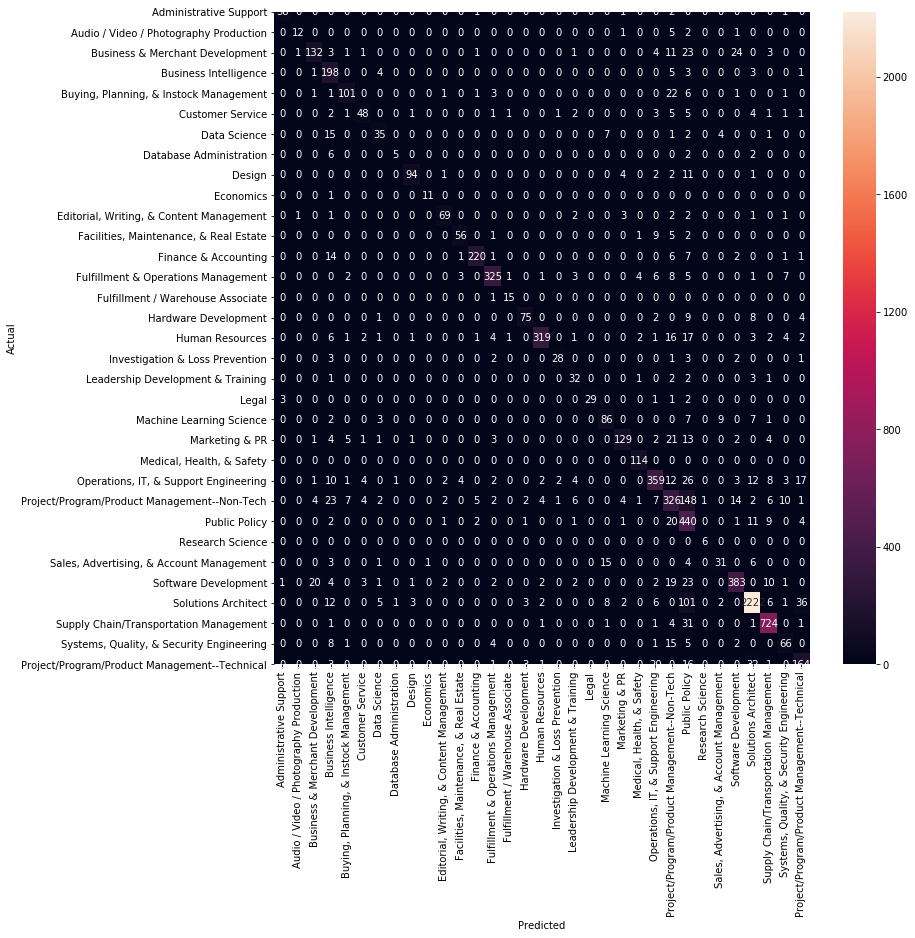

In [34]:
import seaborn as sns


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels = unique_cat.category.values, yticklabels = unique_cat.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /Users/marian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
feat_names = count_vect.get_feature_names()

In [37]:
datax = count_vect.transform(d_FR["Qualif"].to_list())
dfF = pd.DataFrame(data = datax.toarray(), columns = feat_names)
dft = dfF.transpose()

In [38]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,33280,33281,33282,33283,33284,33285,33286,33287,33288,33289
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilitatilor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abitur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
top_dict = {}
for c in dft.columns:
    top = dft[c].sort_values(ascending = False).head(50)
    top_dict[c] = list(zip(top.index, top.values)) 

In [40]:
from collections import Counter

words = []
for role in dft.columns:
    top = [word for (word, count) in top_dict[role]]
    for t in top:
        words.append(t)
        
moc = Counter(words).most_common()

In [42]:
from wordcloud import WordCloud, STOPWORDS
dummyt = ' '.join(words)

In [43]:
wordcloud = WordCloud(relative_scaling = 1.0, max_words = 80, background_color = "white",\
                     colormap = "Dark2").generate(dummyt)

In [44]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

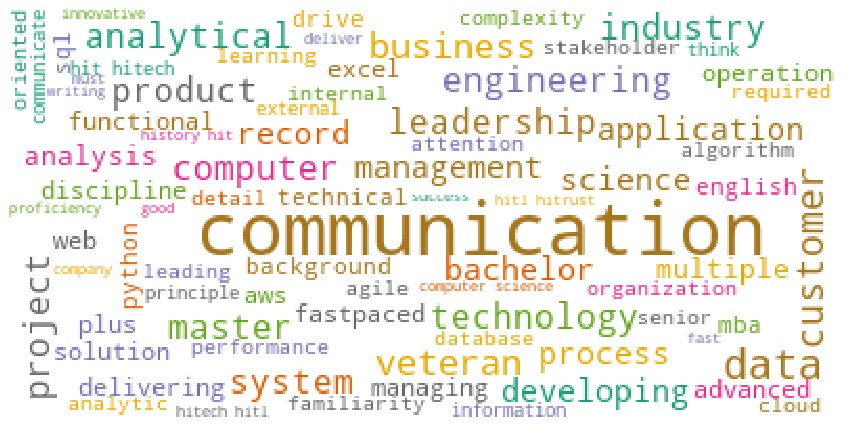

In [45]:
plot_wordcloud(wordcloud)

In [48]:
freq_list[20]

{'Categ': 'Machine Learning Science',
 'unigr': ['terabyte',
  'nonparametric',
  'statistical',
  'tensor',
  'dialog',
  'thought',
  'ranking',
  'emnlp',
  'distilling',
  'learned',
  'cnn',
  'convolutional',
  'naacl',
  'acl',
  'supervised',
  'unsupervised',
  'lstm',
  'said',
  'venue',
  'residual',
  'gpgpu',
  'wwwamazoncom',
  'postdoc',
  'cvpr',
  'mathematics',
  'peerreview',
  'recurrent',
  'rnns',
  'cnns',
  'bayesian',
  'modeling',
  'python',
  'kera',
  'reinforcement',
  'speechjobs',
  'scientist',
  'personalization',
  'clarifying',
  'advancing',
  'neurips',
  'formalizing',
  'compellingly',
  'nonscience',
  'probabilistic',
  'computational',
  'researching',
  'tpami',
  'iccv',
  'visithttp',
  'aistats',
  'postdoctoral',
  'retrieval',
  'consideration',
  'ijrr',
  'corl',
  'icra',
  'tro',
  'convey',
  'matlab',
  'novel',
  'kdd',
  'dialogue',
  'applying',
  'rigorous',
  'tensorflow',
  'premier',
  'mathematical',
  'digitalproducts',
 